In [1]:
print('hello world')

hello world


Black Friday Dataset EDA And Feature Engineering
Cleaning and preparing the data for model training

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [34]:
### Importing the dataset
df_train=pd.read_csv('blackfriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [35]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
## Importing dataset
df_test=pd.read_csv('blackfriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [37]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [38]:
## Merge both tran and test data set
df=df_train.append(df_test)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [39]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [41]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [42]:
df.drop(['User_ID'],axis=1,inplace=True)

In [43]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+


df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [44]:
## Handling categorical data features Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [45]:
pd.get_dummies(df['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
5,0,1,0,0,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


In [46]:
## Hendle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [47]:
###pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [18]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encode Labels in column 'species'.
df['Age'] = label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [48]:
df

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+
5,3,A,1,0,15,1,2.0,NaN,P00193542,15227.0,3
6,5,B,1,1,7,1,8.0,17.0,P00184942,19215.0,2
7,5,B,1,1,7,1,15.0,NaN,P00346142,15854.0,2
8,5,B,1,1,7,1,16.0,NaN,P0097242,15686.0,2
9,3,A,1,1,20,8,NaN,NaN,P00274942,7871.0,1


In [49]:
## fixing categorical city_categort
df_cities=pd.get_dummies(df['City_Category'],drop_first=True)

In [21]:
df_cities

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,0
8,1,0
9,0,0


In [50]:
df=pd.concat([df,df_cities],axis=1)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [51]:
#drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [52]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [53]:
## Missing Values
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [54]:
## Focus on replacing missing values
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [55]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [56]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [57]:
df['Product_Category_1'].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [58]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [59]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [60]:
df['Product_Category_2'].mode()[0]

8.0

In [61]:
# Replace the missing values Product_Category_2
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [62]:
df['Product_Category_2'].isnull().sum()

0

In [63]:
df['Product_Category_3'].mode()[0]

16.0

In [64]:
# Replace the missing values Product_Category_3
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [65]:
df['Product_Category_3'].isnull().sum()

0

In [66]:
df.shape

(783667, 12)

In [67]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [68]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [41]:
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
5         3
6         2
7         2
8         2
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        4
20        4
21        4
22        4
23        4
24        4
25        0
26        0
27        0
28        0
29        4
         ..
233569    1
233570    1
233571    0
233572    1
233573    1
233574    1
233575    1
233576    1
233577    1
233578    3
233579    1
233580    1
233581    3
233582    2
233583    2
233584    2
233585    1
233586    1
233587    4
233588    1
233589    1
233590    3
233591    1
233592    3
233593    4
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [42]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,0,NaN,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,0,NaN,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,0,NaN,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,0,NaN,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,6,NaN,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [70]:
##Convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [71]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.3+ MB


In [73]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


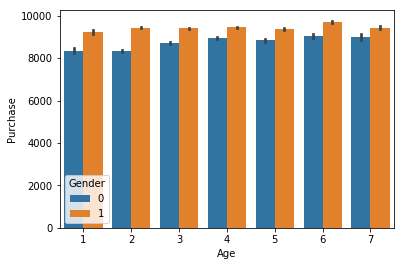

In [75]:
## Visualisation age & purchase by gender
sns.barplot('Age','Purchase',hue='Gender',data=df)

Observation : Purchasing of man is high then woman

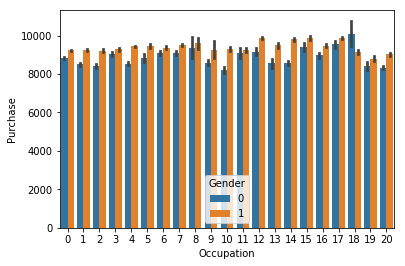

In [76]:
## Visualization of purchase with occpation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

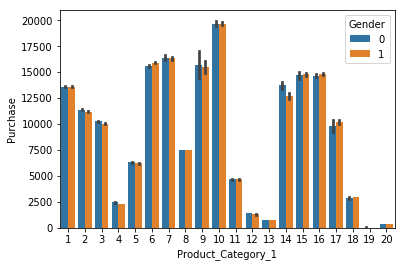

In [77]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

Product Category 1 is Man and Women is Equal

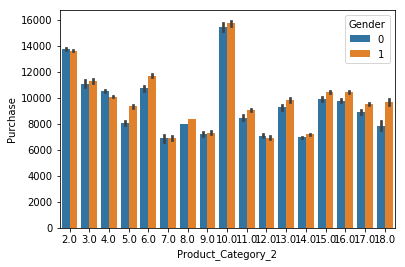

In [78]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

Product Category 2 is Man is high then Women 

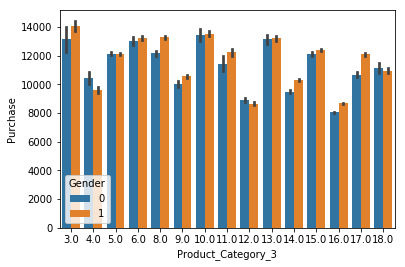

In [132]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

Product Category 3 is Man is high then Women 

In [79]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [80]:
## Feature Scaling
df_test=df[df['Purchase'].isnull()]

In [81]:
df_train=df[~df['Purchase'].isnull()]

In [82]:
x=df_train.drop('Purchase',axis=1)

In [83]:
y=df_train['Purchase']

In [84]:
x.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,4,0,1


In [85]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [86]:
x.shape

(550068, 11)

In [87]:
y.shape

(550068,)

In [89]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
550038      596.0
550039      595.0
550040       26.0
550041      488.0
550042      243.0
550043       48.0
550044       62.0
550045      252.0
550046      236.0
550047      244.0
550048      591.0
550049      473.0
550050      368.0
550051      489.0
550052      239.0
550053      371.0
550054       60.0
550055      238.0
550056      254.0
550057       61.0
550058      121.0
550059       48.0
550060      494.0
550061      599.0
550062    

In [94]:
import numpy as np
# import matplotlib library
import matplotlib.pyplot as plt
from matplotlib import style # for grid stylying
%matplotlib inline 

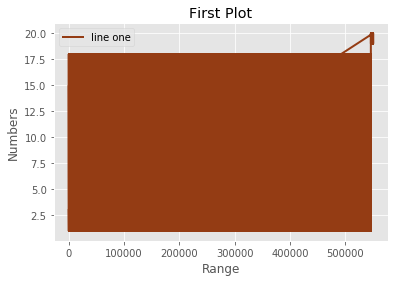

In [96]:
# select the style of the plot
style.use('ggplot')
# plot the random numbers
plt.plot(df['Product_Category_1'],color = '#943C14',label = 'line one',linewidth = 2)
# x-axis is the number of random numbers (index)
plt.xlabel('Range')
# y-axis is actual random numbers
plt.ylabel('Numbers')
# title of the plot
plt.title('First Plot')

plt.legend() # to show what does each line represent 
plt.show() # plot the graph as output

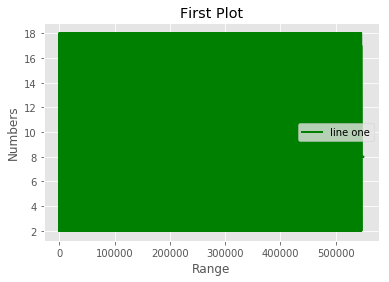

In [97]:
# select the style of the plot
style.use('ggplot')
# plot the random numbers
plt.plot(df['Product_Category_2'],color = 'g',label = 'line one',linewidth = 2)
# x-axis is the number of random numbers (index)
plt.xlabel('Range')
# y-axis is actual random numbers
plt.ylabel('Numbers')
# title of the plot
plt.title('First Plot')

plt.legend() # to show what does each line represent 
plt.show() # plot the graph as output

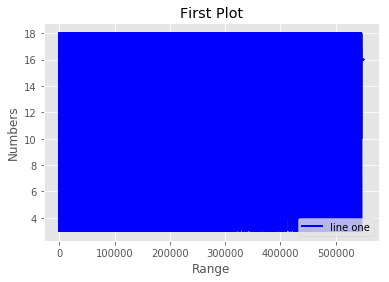

In [98]:
# select the style of the plot
style.use('ggplot')
# plot the random numbers
plt.plot(df['Product_Category_3'],color = 'b',label = 'line one',linewidth = 2)
# x-axis is the number of random numbers (index)
plt.xlabel('Range')
# y-axis is actual random numbers
plt.ylabel('Numbers')
# title of the plot
plt.title('First Plot')

plt.legend() # to show what does each line represent 
plt.show() # plot the graph as output

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)

In [102]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [104]:
X_train

array([[-1.10505734,  0.57141282, -0.83402516, ...,  0.88362201,
         1.17569512, -0.67282374],
       [ 1.84716932,  0.57141282,  1.1990046 , ..., -1.44207714,
        -0.85056064, -0.67282374],
       [ 0.37105599,  0.57141282, -0.83402516, ..., -1.44207714,
        -0.85056064,  1.48627336],
       ...,
       [-1.10505734, -1.75004823, -0.83402516, ..., -0.66684409,
         1.17569512, -0.67282374],
       [-1.10505734, -1.75004823, -0.83402516, ...,  0.10838896,
         1.17569512, -0.67282374],
       [-1.10505734, -1.75004823,  1.1990046 , ...,  0.10838896,
        -0.85056064, -0.67282374]])

In [105]:
X_test

array([[ 1.84716932,  0.57141282, -0.83402516, ...,  0.88362201,
        -0.85056064,  1.48627336],
       [ 0.37105599, -1.75004823, -0.83402516, ..., -0.66684409,
         1.17569512, -0.67282374],
       [ 0.37105599, -1.75004823,  1.1990046 , ...,  0.10838896,
        -0.85056064, -0.67282374],
       ...,
       [-1.10505734,  0.57141282, -0.83402516, ...,  0.10838896,
        -0.85056064,  1.48627336],
       [ 0.37105599,  0.57141282, -0.83402516, ..., -0.66684409,
        -0.85056064,  1.48627336],
       [-1.10505734,  0.57141282,  1.1990046 , ..., -0.66684409,
         1.17569512, -0.67282374]])

In [ ]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(hspace = 0.8)
plt.subplot(1,2,1)
plt.title('Temp')
plt.plot(time_hrs,temp_data,color = 'b',linestyle = '-',linewidth = 1)
plt.subplot(1,2,2)
plt.title('Wind')
plt.plot(time_hrs,wind_data,color = 'r',linestyle = '-',linewidth = 1)